In [1]:
import pandas as pd
import numpy as np

In [2]:
# DATA LOADING CELL
data_path = "..\\Crimedata.csv"
data = pd.read_csv(data_path) 

c:\Users\Teodora\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (15,40,41,42,43,44,45,46,52,53,54,71,77,78,79,80,82,83,84,85,101,102,103,104,105,130,131,137,153,154,155,156,157,163,164,165,181,182,183,184,191,207,208,209,213,217,233,234,235,236,237,261,262,263,285,286,287,291,307,308,309,310,311,336,337,338,339,361,362,363,366,367,383,384,385,386,387,419,480,547,555,561,562,563,732,734,736,740,752,754,756,760,800,865,866,867,868,869,870,891,917,965,1006,1007,1085,1086,1087,1148,1167,1218,1219,1243,1245,1246,1248,1251,1252,1257,1260,1269,1285,1326,1328,1338,1340,1350,1352,1354,1368,1397,2084,2085,2086,2091) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
col_dict = {
'V1263': 'Alcohol_ever',
'V1300' : 'Marijuana_ever',
'V1294' : 'Heroin_ever',
'V1301' : 'Cocaine_ever',
'V1267': 'Alcohol',
'V1266' : "Alcohol_12months",
 'V1327': 'Marijuana',
 'V1315' : 'Marijuana_30days',
 'V1339' : 'Marijuana_12months',
 'V1330': 'Heroin',
 'V1318' : 'Heroin_30days',
 'V1342' : 'Heroin_12months',
 'V1328': 'Cocaine',
 'V1316': 'Cocaine_30days',
 'V1340': 'Cocaine_12months',
 'RV0001': 'Age',
 'RV0003': 'Race',
 'RV0005': 'Sex',
 'V0772': 'State'}

In [4]:
data.rename(columns=col_dict,inplace=True)

In [5]:
df = data[[
    "Marijuana", 'Marijuana_ever', 'Marijuana_12months', 
    "Heroin", 'Heroin_ever', 'Heroin_12months',
    "Cocaine", 'Cocaine_ever', 'Cocaine_12months',
    "Age","Sex","Race"]]
df['Sex'] = df['Sex'].str.extract(r'([A-Za-z]+)')
#df['Race'] = df['Race'].str.slice(7)
df.to_csv("./extracted_data_vis3.csv",index=False)

c:\Users\Teodora\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
# EXTRACT DATA FOR THE VISUAL
df = pd.read_csv('extracted_data_vis3.csv')

In [21]:
# EXTRACT DRUG USAGE PER TIME
# The counts in these lists are exclusive, eg people who have used 
# drugs at the time of offence are not counted among those who used 
# drugs 12 months ago.
# 
# The order in the lists is: 
# now, 12 months ago, earlier than 12 months ago, never, don't know

def extract_values(df):
    marijuana_values = [
        len(df[(df['Marijuana'] == '(1) 1 = Yes')]),
        len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']=='(1) 1 = Yes')]),
        len(df[(df['Marijuana'] != '(1) 1 = Yes') & (df['Marijuana_12months']!='(1) 1 = Yes') \
            & (df['Marijuana_ever'] == '(1) 1 = Yes')]),
        len(df[(df['Marijuana_ever'] == '(2) 2 = No')]),
        len(df) - len(df[(df['Marijuana_ever'] == '(2) 2 = No')]) - len(df[(df['Marijuana_ever'] == '(1) 1 = Yes')])
    ]

    cocaine_values = [
        len(df[(df['Cocaine'] == '(1) 1 = Yes')]),
        len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']=='(1) 1 = Yes')]),
        len(df[(df['Cocaine'] != '(1) 1 = Yes') & (df['Cocaine_12months']!='(1) 1 = Yes') & \
            (df['Cocaine_ever'] == '(1) 1 = Yes')]),
        len(df[(df['Cocaine_ever'] == '(2) 2 = No')]),
        len(df) - len(df[(df['Cocaine_ever'] == '(2) 2 = No')]) - len(df[(df['Cocaine_ever'] == '(1) 1 = Yes')])
    ]

    heroin_values = [
        len(df[(df['Heroin'] == '(1) 1 = Yes')]),
        len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']=='(1) 1 = Yes')]),
        len(df[(df['Heroin'] != '(1) 1 = Yes') & (df['Heroin_12months']!='(1) 1 = Yes') & (df['Heroin_ever'] == '(1) 1 = Yes')]),
        len(df[(df['Heroin_ever'] == '(2) 2 = No')]),
        len(df) - len(df[(df['Heroin_ever'] == '(2) 2 = No')]) - len(df[(df['Heroin_ever'] == '(1) 1 = Yes')])
    ]

    return marijuana_values, heroin_values, cocaine_values

24848 24848 24848
[4889, 4487, 11263, 3994, 215] [1471, 763, 2662, 19740, 212] [2154, 1877, 8325, 12282, 210]


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def survey(results, category_names, title):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('magma')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 7))
    ax.set_title('title')
    
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    fig.suptitle(title)  
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    return fig, ax
#https://stackoverflow.com/questions/7908636/how-to-add-hovering-annotations-to-a-plot

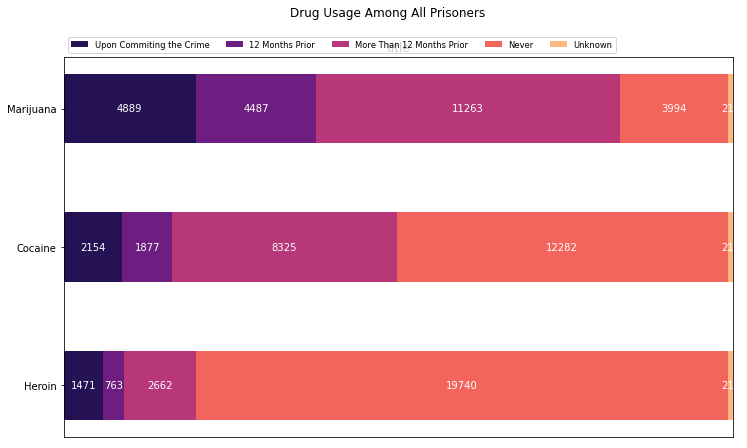

In [25]:
# CREATE VIS FOR EVERY PRISONER
marijuana_values, heroin_values, cocaine_values = extract_values(df)
category_names = ['Upon Commiting the Crime', '12 Months Prior', 'More Than 12 Months Prior', 'Never', "Unknown"]
results = {
    'Marijuana': marijuana_values,
    'Cocaine': cocaine_values,
    'Heroin': heroin_values
}
survey(results, category_names, 'Drug Usage Among All Prisoners')
plt.show()

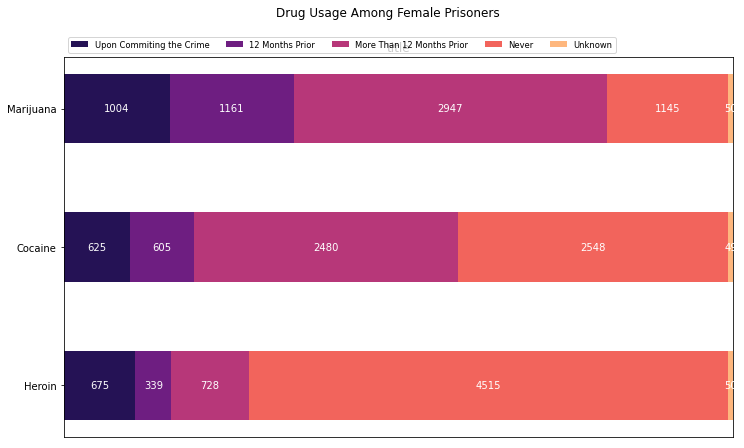

In [27]:
# CREATE VIS FOR FEMALE PRISONERS
df_female = df[df['Sex']=='Female']

fem_marijuana_values, fem_heroin_values, fem_cocaine_values = extract_values(df_female)
category_names = ['Upon Commiting the Crime', '12 Months Prior', 'More Than 12 Months Prior', 'Never', "Unknown"]
results = {
    'Marijuana': fem_marijuana_values,
    'Cocaine': fem_cocaine_values,
    'Heroin': fem_heroin_values
}
survey(results, category_names, 'Drug Usage Among Female Prisoners')
plt.show()

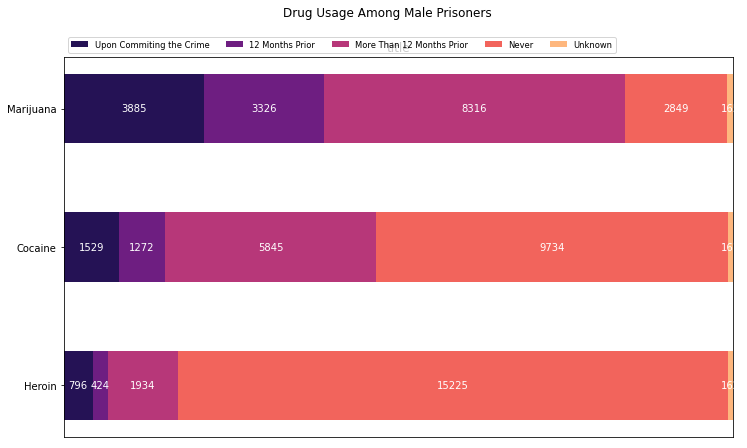

In [28]:
# CREATE VIS FOR MALE PRISONERS
df_male = df[df['Sex']=='Male']

male_marijuana_values, male_heroin_values, male_cocaine_values = extract_values(df_male)
category_names = ['Upon Commiting the Crime', '12 Months Prior', 'More Than 12 Months Prior', 'Never', "Unknown"]
results = {
    'Marijuana': male_marijuana_values,
    'Cocaine': male_cocaine_values,
    'Heroin': male_heroin_values
}
survey(results, category_names, 'Drug Usage Among Male Prisoners')
plt.show()